# Air Quality Forecasting - Experiments

## 1. Setup and imports

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('..')
from src.data_utils import *
from src.model_utils import *

sns.set_style('whitegrid')

## 2. Data Preparation Pipeline
Here we prepare the data, using the longer sequence length of 48 hours

In [2]:
# Load, clean, and add features
df = load_data('../data/train.csv')
df = handle_missing_values(df)
df = create_time_features(df)

# Split into training and validation sets
df_train, df_val = split_data(df)

# Scale the features using RobustScaler
features_to_scale = ['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'hour', 'day_of_week', 'month']
df_train_scaled, df_val_scaled, scaler = scale_features(
    train_df=df_train.copy(), 
    val_df=df_val.copy(), 
    columns_to_scale=features_to_scale,
    scaler_type='robust'
)

# Create sequences with the new, longer history
N_PAST = 48 # <-- Key change for this experiment
TARGET_COL = 'pm2.5'
target_col_idx = df_train_scaled.columns.get_loc(TARGET_COL)

X_train, y_train = create_sequences(df_train_scaled.values, N_PAST, target_col_idx)
X_val, y_val = create_sequences(df_val_scaled.values, N_PAST, target_col_idx)

print(f"\n✅ Sequences created: X_train shape is {X_train.shape}")

✅ Data loaded successfully.
✅ Missing values handled.
✅ Time-based features created.
✅ Data split into training and validation sets.
✅ Features scaled using RobustScaler.

✅ Sequences created: X_train shape is (26026, 48, 13)


/Users/testsolutions/Documents/school/year3/term2/time-series-forecasting/tsf-repo/notebooks/../src/data_utils.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')
/Users/testsolutions/Documents/school/year3/term2/time-series-forecasting/tsf-repo/notebooks/../src/data_utils.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.91666667 -0.83333333 -0.75       ... -0.33333333 -0.25
 -0.16666667]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  train_df.loc[:, columns_to_scale] = scaler.fit_transform(train_df[columns_to_scale])
/Users/testsolutions/Documents/school/year3/term2/time-series-forecasting/tsf-repo/notebooks/../src/data_utils.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a f

## 3. Run Bidirectional LSTM Experiment


✅ Model built and compiled successfully.


/Users/testsolutions/Documents/school/year3/term2/time-series-forecasting/tsf-repo/.venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
806/814 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1239
Epoch 1: val_loss improved from None to 0.06762, saving model to ../experiments/03_bidirectional_lstm.keras
814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0778 - val_loss: 0.0676
Epoch 2/50
806/814 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0452
Epoch 2: val_loss did not improve from 0.06762
814/814 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0453 - val_loss: 0.0698
Epoch 3/50
805/814 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0435
Epoch 3: val_loss improved from 0.06762 to 0.06547, saving model to ../experiments/03_bidirectional_lstm.keras
814/814 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0442 - val_loss: 0.0655
Epoch 4/50
807/814 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0443
Epoch 4: val_loss improved from 0.06547 to 0.06357, saving model to ../experiments/03_bidirectional_lstm.keras
814/814 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0430 - val_loss: 0.0636
Epoch 5/50
812/814 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - l

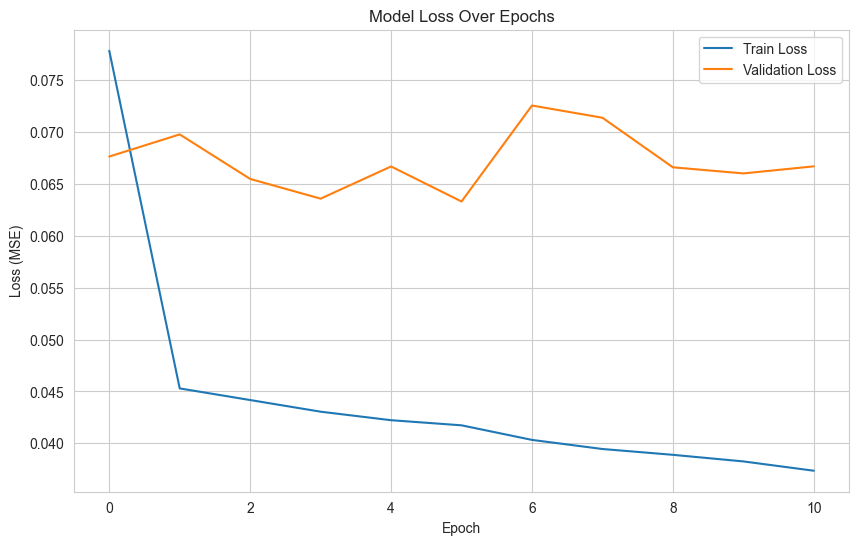

143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 128)            │        39,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,197 (469.52 KB)

 Trainable params: 40,065 (156.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 80,132 (313.02 KB)

--- Model Evaluation ---
✅ Final Validation RMSE: 0.25
✅ Comprehensive experiment details logged to: ../experiments/metrics/03_log.txt


In [3]:
# --- Experiment Parameters ---
EXP_ID = '03'
MODEL_TYPE = 'Bidirectional LSTM'
SCALER_TYPE = 'RobustScaler'
BATCH_SIZE = 32
MODEL_UNITS = [64] # A list of units for each layer
MODEL_PATH = f'../experiments/{EXP_ID}_bidirectional_lstm.keras'
LOG_PATH = f'../experiments/metrics/{EXP_ID}_log.txt'

# --- Run Workflow ---
# Build the Bidirectional model
input_shape = (X_train.shape[1], X_train.shape[2])
model = build_model(
    input_shape, 
    units=MODEL_UNITS,
    bidirectional=True # <-- Key change to build the new architecture
)
model.summary()

# Train
history = train_model(model, X_train, y_train, X_val, y_val, MODEL_PATH, batch_size=BATCH_SIZE)

# Evaluate
final_rmse = evaluate_model(history, model, X_val, y_val)

# Log
log_experiment(
    model=model, history=history, rmse=final_rmse, log_path=LOG_PATH,
    exp_id=EXP_ID, model_type=MODEL_TYPE, sequence_length=N_PAST,
    batch_size=BATCH_SIZE, scaler_type=SCALER_TYPE, optimizer='adam',
    notes="Third experiment: Introduced a Bidirectional LSTM and a longer sequence length (48 hours)."
)